# Introduction

This is German credit risk data from the UCI Machine Learning repository with 1000 entries with 10 categorial/symbolic

In this dataset, Each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes.

The selected attributes are: Age (numeric) Sex (text: male, female) Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled) Housing (text: own, rent, or free) Saving accounts (text - little, moderate, quite rich, rich) Checking account (numeric, in DM - Deutsch Mark) Credit amount (numeric, in DM) Duration (numeric, in month) Purpose(text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others Risk (Value target - Good or Bad Risk)

# Importing Packages
* pandas - to manipulate data frames
* numpy - providing linear algebra
* seaborn - to create nice visualizations
* matplotlib - basic tools for visualizations

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\Raj Mahajan\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
!pip install plotly==4.14.3

In [4]:
import plotly.offline as py 
import plotly.graph_objs as go 

# Importing data
* Importing Datset


In [5]:
credit_data = pd.read_csv("C:/Users/Raj Mahajan/Credit-risk-modelling/german_credit_data.csv", index_col=0)
credit_data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


# First Look at the data:
* Type of Data
* Null values
* Unique values
* The first rows of our dataset

In [6]:
#Searching for Missing values from the shape of data


credit_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [7]:
credit_data.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [8]:
credit_data.shape

(1000, 10)

In [9]:
#let check the NaN values

credit_data.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [10]:
for col in ['Saving accounts', 'Checking account']:
    credit_data[col].fillna('none', inplace=True)

In [11]:
k = {0: 'unskilled and non-res', 1: 'unskilled and res', 2: 'skilled', 3: 'highly skilled'}
credit_data['Job'] = credit_data['Job'].map(k)

credit_data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,skilled,own,none,little,1169,6,radio/TV,good
1,22,female,skilled,own,little,moderate,5951,48,radio/TV,bad
2,49,male,unskilled and res,own,little,none,2096,12,education,good
3,45,male,skilled,free,little,little,7882,42,furniture/equipment,good
4,53,male,skilled,free,little,little,4870,24,car,bad


# Data Exploration & Data Visualization

* Skilled workers are more likely to get 'good' risk rating
* Men in all the job category have a higher 'good' than women.

C:\Users\Raj Mahajan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning:

Using the countplot function without specifying `order` is likely to produce an incorrect plot.



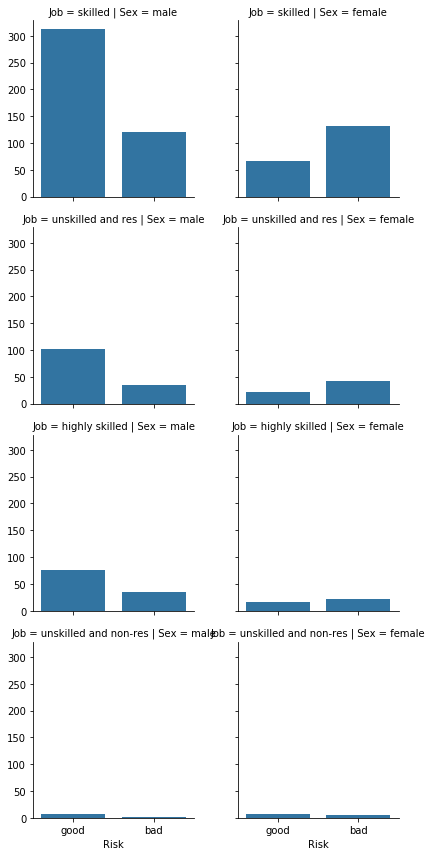

In [12]:

g = sns.FacetGrid(credit_data, col="Sex",  row="Job")

g = g.map(sns.countplot, "Risk")


# Risk Distribution based on Housing Status
 * Home owners are more likely to get a 'good' risk rating on their credit compared to rented individuals

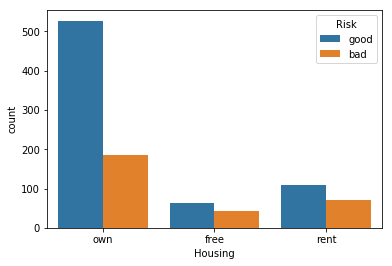

In [13]:
sns.countplot(x="Housing", hue="Risk", data=credit_data)
plt.show()

C:\Users\Raj Mahajan\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning:

matplotlib is currently using a non-GUI backend, so cannot show the figure



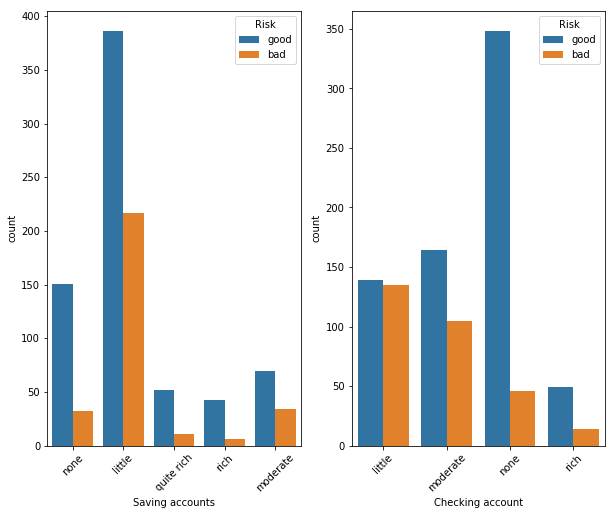

In [14]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,8))
sns.countplot(x="Saving accounts", hue="Risk", data=credit_data, ax=ax1)
sns.countplot(x="Checking account", hue="Risk", data=credit_data, ax=ax2)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)


fig.show()

# Distribution of Credit Amount using Boxplot
* BY PURPOSE - Excluding furniture/equipment and repairs categories, almost all other categories have a larger IQR when it   comes to the   credit amounts of 'bad' loans.
* BY SAVINGS ACCOUNT - rich people tend to borrow less compared to poorer people
* BY JOB TYPE - skilled workers tend to have a bigger and higher IQR for bad loans than for good loans

 

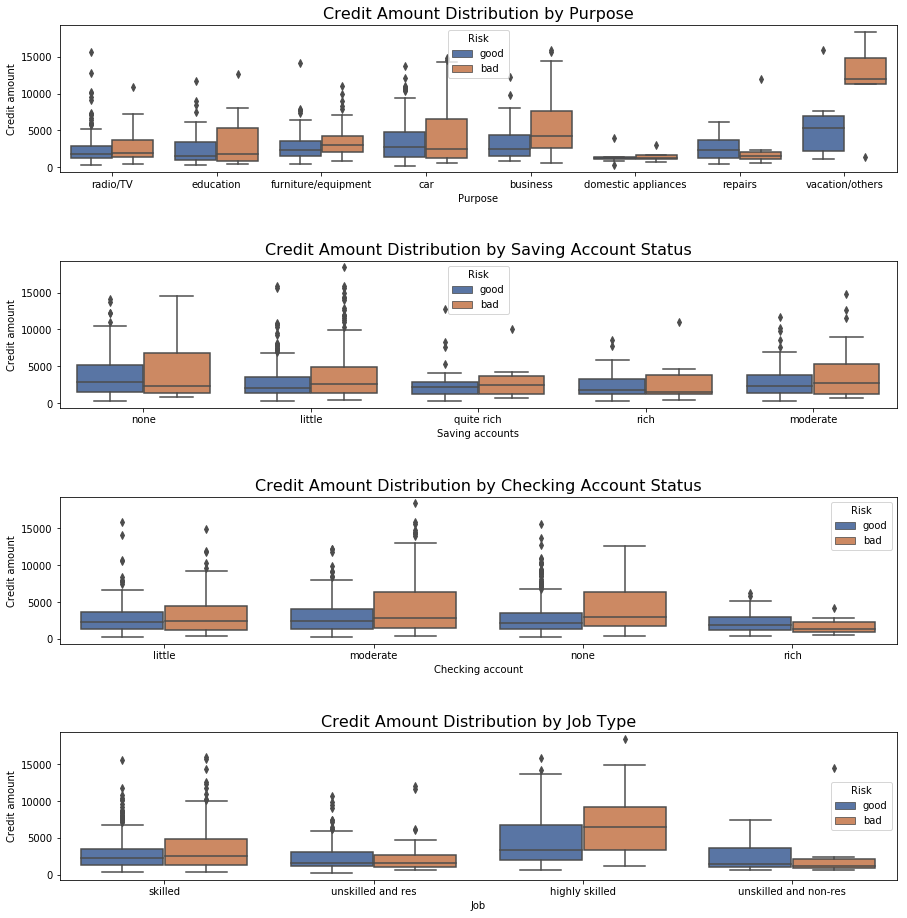

In [15]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(15,25))

sns.boxplot(x="Purpose", y="Credit amount", data=credit_data, hue="Risk", palette="deep", ax=ax1)
sns.boxplot(x="Saving accounts", y="Credit amount", data=credit_data, hue="Risk", palette="deep", ax=ax2)
sns.boxplot(x="Checking account", y="Credit amount", data=credit_data, hue="Risk", palette="deep", ax=ax3)
sns.boxplot(x="Job", y="Credit amount", data=credit_data, hue="Risk", palette="deep", ax=ax4)

ax1.set_title("Credit Amount Distribution by Purpose", fontsize=16)
ax2.set_title("Credit Amount Distribution by Saving Account Status", fontsize=16)
ax3.set_title("Credit Amount Distribution by Checking Account Status", fontsize=16)
ax4.set_title("Credit Amount Distribution by Job Type", fontsize=16)

plt.subplots_adjust(hspace = 0.6, top = 0.6)
plt.show()

# Credit Amount Distribution by Age 

 * Throughout all age gaps, bad loans tend to be of a higher amount but when it comes to people over 55, this gap widens
 

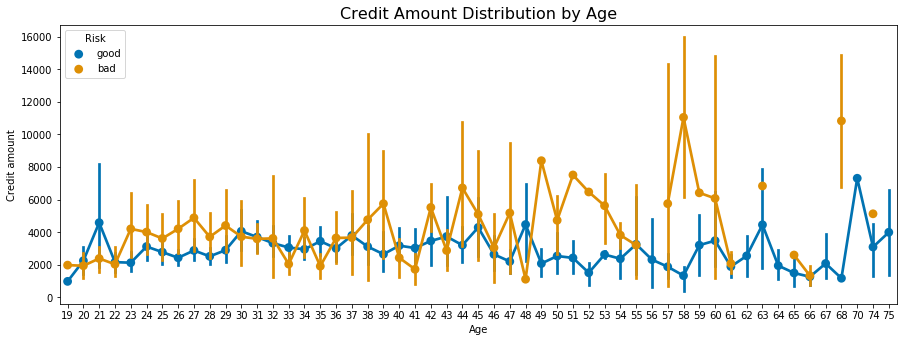

In [16]:
fig, (ax1) = plt.subplots(1,1, figsize=(15,5))

sns.pointplot(x="Age", y="Credit amount", data=credit_data, hue="Risk", palette="colorblind", ax=ax1)


ax1.set_title("Credit Amount Distribution by Age", fontsize=16)


plt.subplots_adjust(wspace = 0.4, hspace = 0.4,top = 0.9)
plt.show()

#  Credit Amount Distribution by Loan Duration

 * larger loans over a longer duration are more likely to be classified as 'good'.

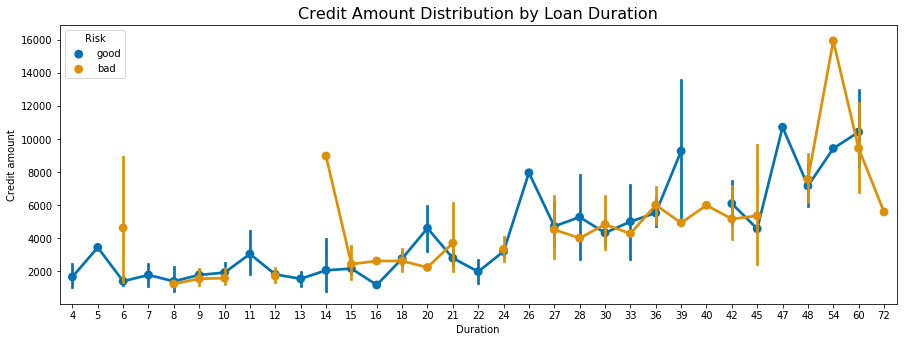

In [17]:
fig, (ax2) = plt.subplots(1,1, figsize=(15,5))
sns.pointplot(x="Duration",y="Credit amount" ,data=credit_data, hue="Risk", palette="colorblind", ax=ax2)

ax2.set_title("Credit Amount Distribution by Loan Duration", fontsize=16)

plt.subplots_adjust(wspace = 0.4, hspace = 0.4,top = 0.9)
plt.show()

# Feature Engineering

We need to create dummies for our categorical variables and then drop the redundant variables

In [18]:
# getting dummies for all the categorical variables
dummies_columns = ['Job', 'Purpose', 'Sex', 'Housing', 'Saving accounts', 'Checking account']
for col in dummies_columns:
    credit_data = credit_data.merge(pd.get_dummies(credit_data[col], drop_first=True, prefix=str(col)), left_index=True, right_index=True) 

# encoding risk as binary
r = {"good":0, "bad": 1}
credit_data['Risk'] = credit_data['Risk'].map(r)

# drop redundant variables
columns_to_drop = ['Job', 'Purpose','Sex','Housing','Saving accounts','Checking account']
credit_data.drop(columns_to_drop, axis=1, inplace=True)

credit_data.head()

,Age,Credit amount,Duration,Risk,Job_skilled,Job_unskilled and non-res,Job_unskilled and res,Purpose_car,Purpose_domestic appliances,Purpose_education,...,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_none,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_none,Checking account_rich
0,67,1169,6,0,1,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
1,22,5951,48,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,49,2096,12,0,0,0,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,45,7882,42,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,53,4870,24,1,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


# Getting Log Normalization & data correlation
* Credit amount distribution more normal

In [19]:
credit_data['Log_CA'] = np.log(credit_data['Credit amount'])

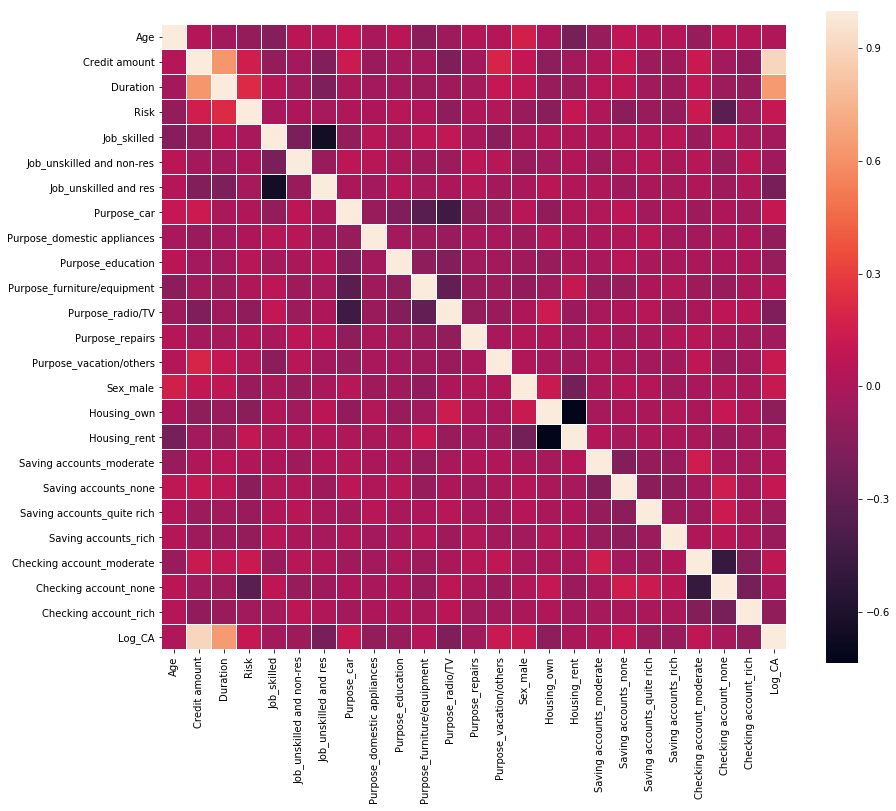

In [20]:
plt.figure(figsize=(14,12))
sns.heatmap(credit_data.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white')
plt.show()


# Preprocessing of models :
* Importing ML librarys
* Setting X and y variables to the prediction
* Splitting Data

In [21]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

C:\Users\Raj Mahajan\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Raj Mahajan\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Raj Mahajan\Anaconda3\lib\site-packages\sklearn\linear_model

In [22]:
X = credit_data.drop(['Risk', 'Credit amount'], axis=1).values
y = credit_data['Risk'].values

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

# Logistic Regression
* Accuracy is 74.5%

In [23]:
log = LogisticRegression(solver = 'lbfgs',max_iter=400)
log.fit(X_train, y_train)
y_pred_log = log.predict(X_test)
print(accuracy_score(y_pred_log, y_test))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

0.745
[[126  15]
 [ 36  23]]
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       141
           1       0.61      0.39      0.47        59

    accuracy                           0.74       200
   macro avg       0.69      0.64      0.65       200
weighted avg       0.73      0.74      0.73       200



C:\Users\Raj Mahajan\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



# K-Nearest Neighbors

* Accuracy is 68.5%

In [24]:
    
# recall peaks at k = 1

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print(accuracy_score(y_pred_knn, y_test))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

0.685
[[117  24]
 [ 39  20]]
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       141
           1       0.45      0.34      0.39        59

    accuracy                           0.69       200
   macro avg       0.60      0.58      0.59       200
weighted avg       0.66      0.69      0.67       200



C:\Users\Raj Mahajan\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



# Support Vector Classification

* Accuracy is 76 % 

In [25]:
svc = SVC(kernel='linear', gamma=10, C=0.8)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print(accuracy_score(y_pred_svc, y_test))
print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

0.76
[[129  12]
 [ 36  23]]
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       141
           1       0.66      0.39      0.49        59

    accuracy                           0.76       200
   macro avg       0.72      0.65      0.67       200
weighted avg       0.75      0.76      0.74       200



# Random Forest


* Accuracy is 73 %

In [26]:
rf = RandomForestClassifier(max_depth=9, max_features=15, min_samples_leaf=5, n_estimators=25)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(accuracy_score(y_pred_rf, y_test))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

0.755
[[130  11]
 [ 38  21]]
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       141
           1       0.66      0.36      0.46        59

    accuracy                           0.76       200
   macro avg       0.72      0.64      0.65       200
weighted avg       0.74      0.76      0.73       200



C:\Users\Raj Mahajan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:489: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Raj Mahajan\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for add

# Naive-Bayes
* Accuracy is 66 %

In [27]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print(accuracy_score(y_pred_nb, y_test))
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

0.66
[[101  40]
 [ 28  31]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       141
           1       0.44      0.53      0.48        59

    accuracy                           0.66       200
   macro avg       0.61      0.62      0.61       200
weighted avg       0.68      0.66      0.67       200



# XGBoost
* Accuracy is 74 %

In [28]:

xgb = XGBClassifier(eta=0.19, max_depth=8, n_estimators=150, subsample=0.8, colsample_bytree=1)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print(accuracy_score(y_pred_xgb, y_test))
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
    

0.74
[[122  19]
 [ 33  26]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.82       141
           1       0.58      0.44      0.50        59

    accuracy                           0.74       200
   macro avg       0.68      0.65      0.66       200
weighted avg       0.73      0.74      0.73       200



#  Stacked Model

In [30]:
x_training, x_valid, y_training, y_valid = train_test_split(X_train, y_train,
                                                            test_size=0.5,
                                                            random_state=42)
#specify models
model1 = LogisticRegression()
model2 = SVC(kernel='linear', gamma=10, C=0.8)
model3 = GaussianNB()
model4 = XGBClassifier(eta=0.19, max_depth=8, n_estimators=150, subsample=0.8, colsample_bytree=1)
#fit models
model1.fit(x_training, y_training)
model2.fit(x_training, y_training)
model3.fit(x_training, y_training)
model4.fit(x_training, y_training)
#make pred on validation
preds1 = model1.predict(x_valid)
preds2 = model2.predict(x_valid)
preds3 = model3.predict(x_valid)
preds4 = model4.predict(x_valid)
#make pred on test
testpreds1 = model1.predict(X_test)
testpreds2 = model2.predict(X_test)
testpreds3 = model3.predict(X_test)
testpreds4 = model4.predict(X_test)
#form new dataset from valid and test
stackedpredictions = np.column_stack((preds1, preds2, preds3, preds4))
stackedtestpredictions = np.column_stack((testpreds1, testpreds2,
                                              testpreds3, testpreds4))
#make meta model
metamodel = LogisticRegression()
metamodel.fit(stackedpredictions, y_valid)
final_predictions = metamodel.predict(stackedtestpredictions)
    
print(accuracy_score(final_predictions, y_test))
print(confusion_matrix(y_test, final_predictions))
print(classification_report(y_test, final_predictions))

0.74
[[135   6]
 [ 46  13]]
              precision    recall  f1-score   support

           0       0.75      0.96      0.84       141
           1       0.68      0.22      0.33        59

    accuracy                           0.74       200
   macro avg       0.72      0.59      0.59       200
weighted avg       0.73      0.74      0.69       200



C:\Users\Raj Mahajan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Raj Mahajan\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Raj Mahajan\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not mo